In [1]:

import os
os.environ['KAGGLE_USERNAME']="simransohal"
os.environ['KAGGLE_KEY']="3aa7697cd9a4ba2a3715c4a29c0f0cb6"

In [2]:
!kaggle datasets download -d mrgeislinger/asl-rgb-depth-fingerspelling-spelling-it-out

asl-rgb-depth-fingerspelling-spelling-it-out.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
with zipfile.ZipFile('asl-rgb-depth-fingerspelling-spelling-it-out.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.optim import Adam

import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt

import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time

In [5]:
d=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
ls

asl-rgb-depth-fingerspelling-spelling-it-out.zip  dataset5/  sample_data/


In [7]:
cd ..

/


In [8]:
data_dir="/content/dataset5"
train_dir = "/content/train"
val_dir = "/content/validation"
test_dir = "/content/test"
train_size=0.8
test_size=0.2
validation_size=0.1

transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])
data=datasets.ImageFolder(root=data_dir,transform=transforms)
dataset_size=len(data)
train_data=int(train_size*dataset_size)
test_data=int(test_size*dataset_size)
validation_data=dataset_size-(train_data+test_data)
train,test,validation=td.random_split(data,[train_data,test_data,validation_data])
data_loader_train = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
data_loader_test  = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)
data_loader_val   = torch.utils.data.DataLoader(validation, batch_size=64, shuffle=True)



In [9]:
learning_rate = 0.001
num_epochs = 10
batch_size = 64

In [10]:
!pip install torch torchvision --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from torchvision.models import shufflenet_v2_x1_0
import torchvision

d=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torchvision.models.shufflenet_v2_x1_0(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 29).to(d)
model=model.to(d)
criterion=nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)



/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []

for epoch in range(num_epochs):
    running_training_loss = 0.0
    running_training_accuracy = 0.0
    model.train()
    for i, (inputs, labels) in enumerate(data_loader_train):
        optimizer.zero_grad()
        inputs = inputs.to(d)  
        labels = labels.to(d) 
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_training_loss += loss.item()
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(data_loader_train)}], Loss: {loss.item()}')
        _, preds = torch.max(outputs, 1)
        running_training_accuracy += torch.sum(preds == labels.data)
    
    epoch_training_loss = running_training_loss / len(data_loader_train)
    epoch_training_accuracy = running_training_accuracy / len(data_loader_train.dataset)
    training_loss.append(epoch_training_loss)
    training_accuracy.append(epoch_training_accuracy)
    
    running_validation_loss = 0.0
    running_validation_accuracy = 0.0
    model.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(data_loader_val):
            inputs = inputs.to(d)  
            labels = labels.to(d)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_validation_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            running_validation_accuracy += torch.sum(preds == labels.data)
    
    epoch_validation_loss = running_validation_loss / len(data_loader_val)
    epoch_validation_accuracy = running_validation_accuracy / len(data_loader_val.dataset)
    validation_loss.append(epoch_validation_loss)
    validation_accuracy.append(epoch_validation_accuracy)
    print('Epoch [{}/{}], Training Loss: {}, Training Accuracy: {}, Validation Loss: {}, Validation Accuracy: {}'
          .format(epoch+1, num_epochs, epoch_training_loss, epoch_training_accuracy, epoch_validation_loss, epoch_validation_accuracy))
     


Epoch [1/10], Step [100/1646], Loss: 0.6560802459716797
Epoch [1/10], Step [200/1646], Loss: 0.40628156065940857
Epoch [1/10], Step [300/1646], Loss: 0.31301605701446533
Epoch [1/10], Step [400/1646], Loss: 0.36254602670669556
Epoch [1/10], Step [500/1646], Loss: 0.423374742269516
Epoch [1/10], Step [600/1646], Loss: 0.3349464237689972
Epoch [1/10], Step [700/1646], Loss: 0.33725592494010925
Epoch [1/10], Step [800/1646], Loss: 0.4221627712249756
Epoch [1/10], Step [900/1646], Loss: 0.2533491253852844
Epoch [1/10], Step [1000/1646], Loss: 0.20785045623779297
Epoch [1/10], Step [1100/1646], Loss: 0.15095412731170654
Epoch [1/10], Step [1200/1646], Loss: 0.2044958770275116
Epoch [1/10], Step [1300/1646], Loss: 0.17643843591213226
Epoch [1/10], Step [1400/1646], Loss: 0.4591665267944336
Epoch [1/10], Step [1500/1646], Loss: 0.48289117217063904
Epoch [1/10], Step [1600/1646], Loss: 0.22116562724113464
Epoch [1/10], Training Loss: 0.41364572143333794, Training Accuracy: 0.8427667617797852, 

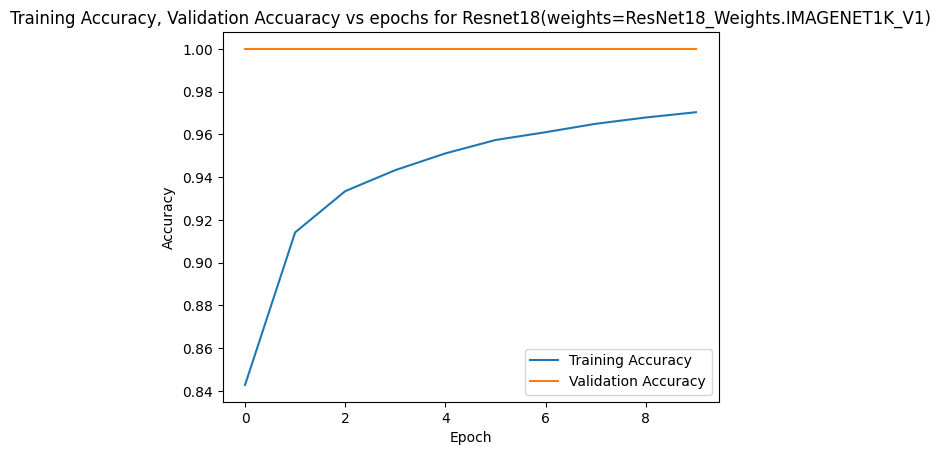

In [13]:


training_accuracy_tensor = torch.tensor(training_accuracy)
validation_accuracy_tensor = torch.tensor(validation_accuracy)

plt.plot(training_accuracy_tensor.to('cpu'), label='Training Accuracy')
plt.plot(validation_accuracy_tensor.to('cpu'), label='Validation Accuracy')
plt.title('Training Accuracy, Validation Accuaracy vs epochs for Resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
     


Test Accuracy: 0.9666957809592527


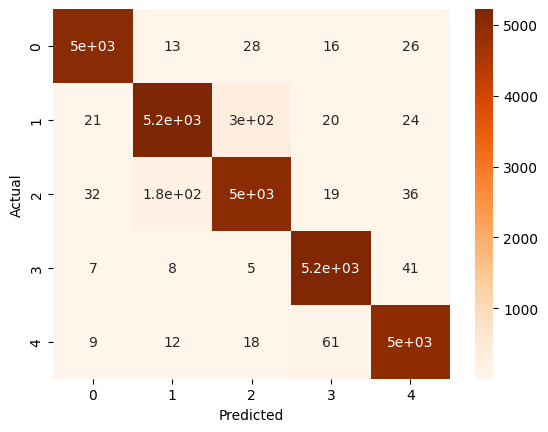

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5133
           1       0.96      0.94      0.95      5587
           2       0.94      0.95      0.94      5305
           3       0.98      0.99      0.98      5249
           4       0.98      0.98      0.98      5059

    accuracy                           0.97     26333
   macro avg       0.97      0.97      0.97     26333
weighted avg       0.97      0.97      0.97     26333



In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

model.eval()
with torch.no_grad():
    test_preds = []
    test_labels = []
    for inputs, labels in data_loader_test:
        inputs = inputs.to(d)
        labels = labels.to(d)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.tolist())
        test_labels.extend(labels.tolist())

test_acc = accuracy_score(test_labels, test_preds)
print('Test Accuracy: {}'.format(test_acc))

#target_names = list(data_loader_train.class_to_idx.keys())
cm = confusion_matrix(test_labels, test_preds)
sns.heatmap(cm, annot=True, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(test_labels, test_preds))

     


In [15]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import shufflenet_v2_x1_0
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size = 64
learning_rate = 0.0001
num_epochs = 10


 
model = shufflenet_v2_x1_0(pretrained=False, num_classes=29).to(device)

 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []

for epoch in range(num_epochs):
    running_training_loss = 0.0
    running_training_accuracy = 0.0
    model.train()
    for i, (inputs, labels) in enumerate(data_loader_train):
        optimizer.zero_grad()
        inputs = inputs.to(d)  
        labels = labels.to(d) 
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_training_loss += loss.item()
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(data_loader_train)}], Loss: {loss.item()}')
        _, preds = torch.max(outputs, 1)
        running_training_accuracy += torch.sum(preds == labels.data)
    
    epoch_training_loss = running_training_loss / len(data_loader_train)
    epoch_training_accuracy = running_training_accuracy / len(data_loader_train.dataset)
    training_loss.append(epoch_training_loss)
    training_accuracy.append(epoch_training_accuracy)
    
    running_validation_loss = 0.0
    running_validation_accuracy = 0.0
    model.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(data_loader_val):
            inputs = inputs.to(d)  
            labels = labels.to(d)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_validation_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            running_validation_accuracy += torch.sum(preds == labels.data)
    
    epoch_validation_loss = running_validation_loss / len(data_loader_val)
    epoch_validation_accuracy = running_validation_accuracy / len(data_loader_val.dataset)
    validation_loss.append(epoch_validation_loss)
    validation_accuracy.append(epoch_validation_accuracy)
    print('Epoch [{}/{}], Training Loss: {}, Training Accuracy: {}, Validation Loss: {}, Validation Accuracy: {}'
          .format(epoch+1, num_epochs, epoch_training_loss, epoch_training_accuracy, epoch_validation_loss, epoch_validation_accuracy))

  


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/10], Step [100/1646], Loss: 1.5851109027862549
Epoch [1/10], Step [200/1646], Loss: 1.2074798345565796
Epoch [1/10], Step [300/1646], Loss: 1.1560544967651367
Epoch [1/10], Step [400/1646], Loss: 0.9428462982177734
Epoch [1/10], Step [500/1646], Loss: 1.0795538425445557
Epoch [1/10], Step [600/1646], Loss: 1.080322504043579
Epoch [1/10], Step [700/1646], Loss: 0.8523932099342346
Epoch [1/10], Step [800/1646], Loss: 0.8410861492156982
Epoch [1/10], Step [900/1646], Loss: 0.8402429819107056
Epoch [1/10], Step [1000/1646], Loss: 0.8484982848167419
Epoch [1/10], Step [1100/1646], Loss: 0.7581234574317932
Epoch [1/10], Step [1200/1646], Loss: 0.7569495439529419
Epoch [1/10], Step [1300/1646], Loss: 0.6902029514312744
Epoch [1/10], Step [1400/1646], Loss: 0.7264006733894348
Epoch [1/10], Step [1500/1646], Loss: 0.5667104721069336
Epoch [1/10], Step [1600/1646], Loss: 0.704106330871582
Epoch [1/10], Training Loss: 0.9667864060742307, Training Accuracy: 0.6062904596328735, Validation 

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

model.eval()
with torch.no_grad():
    test_preds = []
    test_labels = []
    for inputs, labels in data_loader_test:
        inputs = inputs.to(d)
        labels = labels.to(d)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.tolist())
        test_labels.extend(labels.tolist())

test_acc = accuracy_score(test_labels, test_preds)
print('Test Accuracy: {}'.format(test_acc))


Test Accuracy: 0.9244673983214977


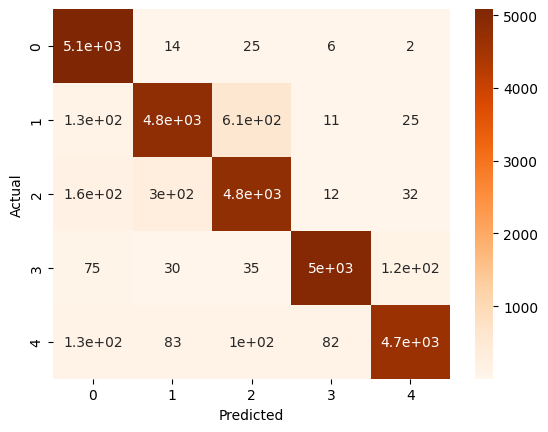

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5133
           1       0.92      0.86      0.89      5587
           2       0.86      0.90      0.88      5305
           3       0.98      0.95      0.96      5249
           4       0.96      0.92      0.94      5059

    accuracy                           0.92     26333
   macro avg       0.93      0.93      0.93     26333
weighted avg       0.93      0.92      0.92     26333



In [19]:

#target_names = list(data_loader_train.class_to_idx.keys())
cm = confusion_matrix(test_labels, test_preds)
sns.heatmap(cm, annot=True, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(test_labels, test_preds))

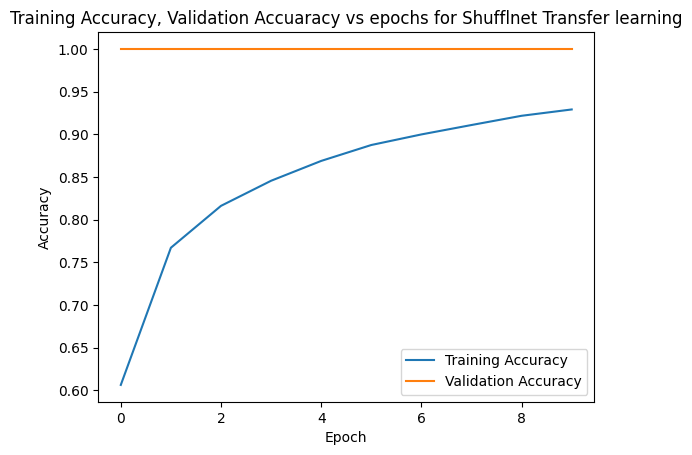

In [21]:
training_accuracy_tensor = torch.tensor(training_accuracy)
validation_accuracy_tensor = torch.tensor(validation_accuracy)

plt.plot(training_accuracy_tensor.to('cpu'), label='Training Accuracy')
plt.plot(validation_accuracy_tensor.to('cpu'), label='Validation Accuracy')
plt.title('Training Accuracy, Validation Accuaracy vs epochs for Shufflnet Transfer learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
data_folder = '/content/drive/MyDrive/asl_alphabet_train'

In [28]:
cd content

/content


In [30]:
cd drive

/content/drive


In [31]:
cd MyDrive

/content/drive/MyDrive


In [40]:


num_classes=3
model = torch.hub.load('pytorch/vision:v0.10.0', 'shufflenet_v2_x1_0', pretrained=False)
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 3 )
model = model.to(d)
transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])
dataset = datasets.ImageFolder(r"asl_alphabet_train", transform=transforms)
train_size = int(0.7 * len(dataset))
validation_size=int(0.1*len(dataset))
test_size = len(dataset) - (train_size+validation_size)
train_dataset,validation_dataset,test_dataset = torch.utils.data.random_split(dataset, [train_size,validation_size, test_size])
train_dataset.transform=transforms
from torch.utils.data import DataLoader
loader_train=DataLoader(train_dataset,batch_size=64,shuffle=True )
loader_val=DataLoader(validation_dataset,batch_size=64,shuffle=True)
loader_test=DataLoader(test_dataset,batch_size=64,shuffle=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import shufflenet_v2_x1_0
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

batch_size = 64
learning_rate = 0.0001
num_epochs = 10



 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []

for epoch in range(num_epochs):
    running_training_loss = 0.0
    running_training_accuracy = 0.0
    model.train()
    for i, (inputs, labels) in enumerate(loader_train):
        optimizer.zero_grad()
        inputs = inputs.to(d)  
        labels = labels.to(d) 
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_training_loss += loss.item()
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(loader_train)}], Loss: {loss.item()}')
        _, preds = torch.max(outputs, 1)
        running_training_accuracy += torch.sum(preds == labels.data)
    
    epoch_training_loss = running_training_loss / len(loader_train)
    epoch_training_accuracy = running_training_accuracy / len(loader_train.dataset)
    training_loss.append(epoch_training_loss)
    training_accuracy.append(epoch_training_accuracy)
    
    running_validation_loss = 0.0
    running_validation_accuracy = 0.0
    model.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(loader_val):
            inputs = inputs.to(d)  
            labels = labels.to(d)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_validation_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            running_validation_accuracy += torch.sum(preds == labels.data)
    
    epoch_validation_loss = running_validation_loss / len(loader_val)
    epoch_validation_accuracy = running_validation_accuracy / len(loader_val.dataset)
    validation_loss.append(epoch_validation_loss)
    validation_accuracy.append(epoch_validation_accuracy)
    print('Epoch [{}/{}], Training Loss: {}, Training Accuracy: {}, Validation Loss: {}, Validation Accuracy: {}'
          .format(epoch+1, num_epochs, epoch_training_loss, epoch_training_accuracy, epoch_validation_loss, epoch_validation_accuracy))

  
